# Plotting the number of contacts
The following scripts use the results of a standard gromacs tool, which prints a time series of residues with a spatial contact. Matplotlib makes it easy to plot the data of multiple simulations and add more information.

In [1]:
import numpy as np
import scipy
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.interactive(True)
#%config InlineBackend.figure_format = 'pdf'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import gridspec

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['figure.autolayout'] = False

# The following require a working LaTex and some styles. Uncomment if available.
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "sans-serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = [
#    r"\usepackage{subdepth}",
#    r"\usepackage{type1cm}",
#    r'\usepackage{tgheros}',    # helvetica font
#    r'\usepackage{sansmath}',   # math-font matching  helvetica
#    r'\sansmath'                # actually tell tex to use it!
#    r'\usepackage{siunitx}',    # micro symbols
#    r'\sisetup{detect-all}',    # force siunitx to use the fonts
#]  

print(plt.rcParams['figure.figsize'])

# These are some size definitions to determine the size of the figure.  Single column:1 Doubl Column:2
def set_size(column=0):
    if (column==0):
        plt.rcParams['figure.figsize']   = [10,6]
        plt.rcParams['axes.labelsize']   = 18 
        plt.rcParams['axes.titlesize']   = 20 
        plt.rcParams['font.size']        = 16 
        plt.rcParams['lines.linewidth']  = 2.0 
        plt.rcParams['lines.markersize'] = 8 
        plt.rcParams['legend.fontsize']  = 14 
    elif (column==1):
        plt.rcParams['figure.figsize']   = [3.5,3.5*0.6]
        plt.rcParams['axes.labelsize']   = 10 
        plt.rcParams['axes.titlesize']   = 12 
        plt.rcParams['font.size']        = 10 
        plt.rcParams['lines.linewidth']  = 1.5 
        plt.rcParams['lines.markersize'] = 10 
        plt.rcParams['legend.fontsize']  = 10 
    elif (column==2):
        plt.rcParams['figure.figsize']   = [7.0,7.0*0.6]
        plt.rcParams['axes.labelsize']   = 10 
        plt.rcParams['axes.titlesize']   = 12 
        plt.rcParams['font.size']        = 10 
        plt.rcParams['lines.linewidth']  = 2.0 
        plt.rcParams['lines.markersize'] = 10 
        plt.rcParams['legend.fontsize']  = 10 


[6.0, 4.0]


### First Plot only the time series.
The following script loads the data given in the file name.  Each directory is from a different simultion setup.  Originally I had many files in each directory. So the function makes it easy to plot different analysis from each simulation setup in the same format. Changing the file name to shows a different analysis in the same style.

In [2]:
plt.rcParams['figure.figsize'] = [5,3]
print(plt.rcParams['figure.figsize'])

def plotthis(name):
    plt.rcParams["image.cmap"] = 'Dark2'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
    
    nc_fl={}
    nc_fl[0]=np.loadtxt('nc0/' + name)
    nc_fl[1]=np.loadtxt('nc1/' + name)

    fl={}
    fl[0]=np.loadtxt('fl0/' + name)
    fl[1]=np.loadtxt('fl1/' + name)


    fig=plt.figure()
    #fig.set_size_inches(figsize(3.25), forward=True)
    plt.plot(nc_fl[0][::10,0],nc_fl[0][::10,1], label="NCAP 0")  
    plt.plot(nc_fl[1][::10,0],nc_fl[1][::10,1], label="NCAP 1")    
    plt.plot(fl[0][::10,0],fl[0][::10,1], label="No NCAP 0")  
    plt.plot(fl[1][::10,0],fl[1][::10,1], label="No NCAP 1")  

    plt.ylabel(r'Number of contacts')
    plt.xlabel(r'time / ns')
    plt.yticks(np.arange(0,26,2))
    plt.legend()

[5.0, 3.0]


Now that we have the function defined, lets echo on the screen the overall parameters and run the function and save the result also in a pdf file of the name given.

[5.0, 3.0]


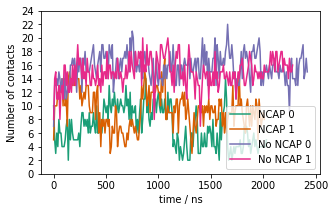

In [3]:
print(plt.rcParams['figure.figsize'])
plotthis('C_D.n.dat')

### Next add histograms to illustrate the time average.
Time next script defines a function, which plots the same series but adds also the histograms. This function also saves a pdf.

In [4]:
def plotthis_h(name,save=False):  
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rcParams["image.cmap"] = 'Dark2'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
    
    nc_fl={}
    nc_fl[0]=np.loadtxt('nc0/' + name)
    nc_fl[1]=np.loadtxt('nc1/' + name)


    fl={}
    fl[0]=np.loadtxt('fl0/' + name)
    fl[1]=np.loadtxt('fl1/' + name)

    f=plt.figure() #figsize=(8, 6))
    #f.set_size_inches(figsize(3.5), forward=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
    gs.update(wspace=0.05)

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
 
    nc1=ax1.plot(nc_fl[0][::10,0],nc_fl[0][::10,1], label="NCAP 0")  
    nc2=ax1.plot(nc_fl[1][::10,0],nc_fl[1][::10,1], label="NCAP 1")  
    aa1=ax1.plot(fl[0][::10,0],fl[0][::10,1], label="No NCAP 0")  
    aa2=ax1.plot(fl[1][::10,0],fl[1][::10,1], label="No NCAP 1") 
    
    ax2.hist(nc_fl[0][500:,1], label="NCAP 0", orientation='horizontal', density=True, histtype='step', alpha=1)  
    ax2.hist(nc_fl[1][500:,1], label="NCAP 1", orientation='horizontal', density=True, histtype='step', alpha=1)  
    ax2.hist(fl[0][500:,1], label="No NCAP 0", orientation='horizontal', density=True, histtype='step', alpha=1)  
    ax2.hist(fl[1][500:,1], label="No NCAP 1", orientation='horizontal', density=True, histtype='step', alpha=1)
    
    ax1.set_ylabel(r'Number of contacts')
    ax1.set_xlabel(r'time / ns')
    ax1.set_ylim([2,24])
    ax1.set_yticks(np.arange(2,24,5)) 
    
    ax2.set_xlabel(r'$\rho$')
    ax2.set_ylim([2,24])
    ax2.set_yticks([])
    ax2.set_xlim([0,0.5])
    #ax2.set_xticks(np.arange(0.1, 0.5, 0.25)) 

    ax1.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
    
    if save!=False:
       # plt.savefig("test.eps")
        plt.savefig(save, bbox_inches='tight', pad_inches=0.05)


Now run the function.

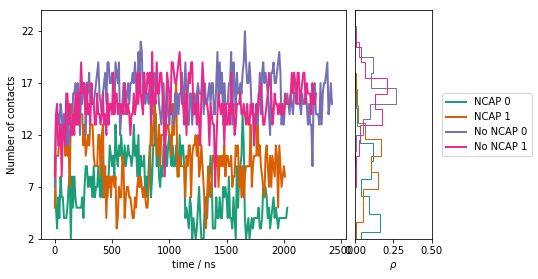

In [5]:
set_size(2)
plotthis_h('C_D.n.dat', save='C_D.pdf')